In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
music_impact=pd.read_csv('mxmh_survey_results.csv')

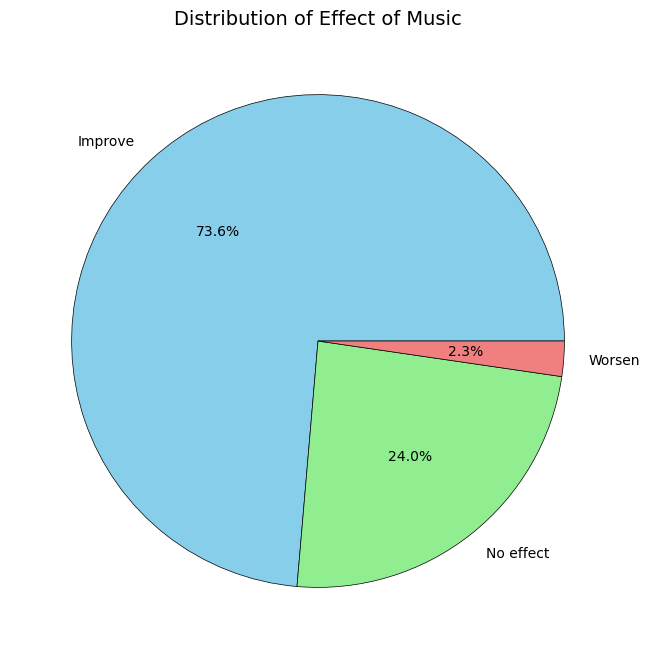

In [10]:
#PIE CHART

def piechart():
  """
  function for pie chart
  """
  me_count = music_impact['Music effects'].value_counts()
  plt.figure(figsize=(8, 8))
  plt.pie(me_count, labels=me_count.index, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
  plt.title('Distribution of Effect of Music', fontsize=14)
  plt.show()
  return

piechart()

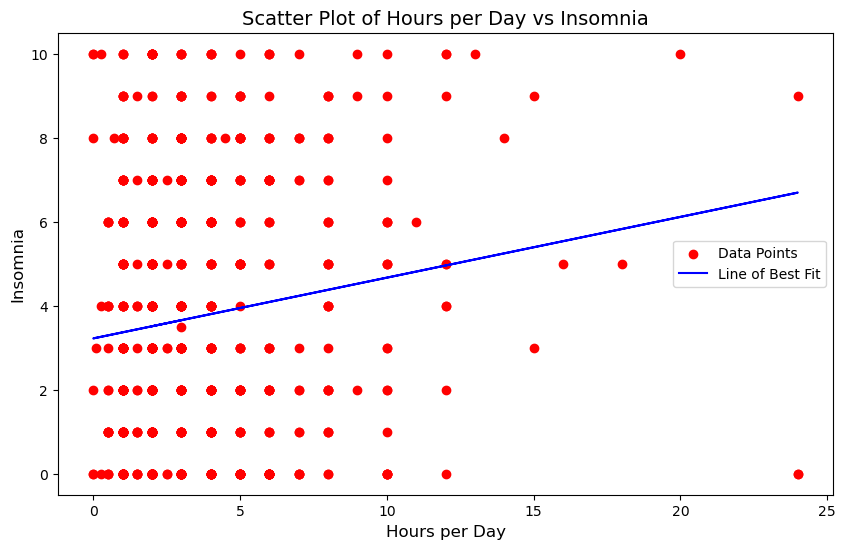

In [12]:
#SCATTER PLOT WITH LINE FITTING

def scatterplot(music_impact):
    """
    function to plot a scatter plot and line fitting
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(music_impact['Hours per day'], music_impact['Insomnia'], color='red', label='Data Points')
    hpd = music_impact['Hours per day']
    ins = music_impact['Insomnia']
    m, b = np.polyfit(hpd, ins, 1)
    plt.plot(hpd, m*hpd + b, color='blue', label='Line of Best Fit')
    plt.title('Scatter Plot of Hours per Day vs Insomnia', fontsize=14)
    plt.xlabel('Hours per Day', fontsize=12)
    plt.ylabel('Insomnia', fontsize=12)
    plt.legend()
    plt.show()
    return

scatterplot(music_impact)

C:\Users\donaa\AppData\Local\Temp\ipykernel_25232\2578758337.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Music effects', y='Hours per day', data=music_impact, palette="Set1")


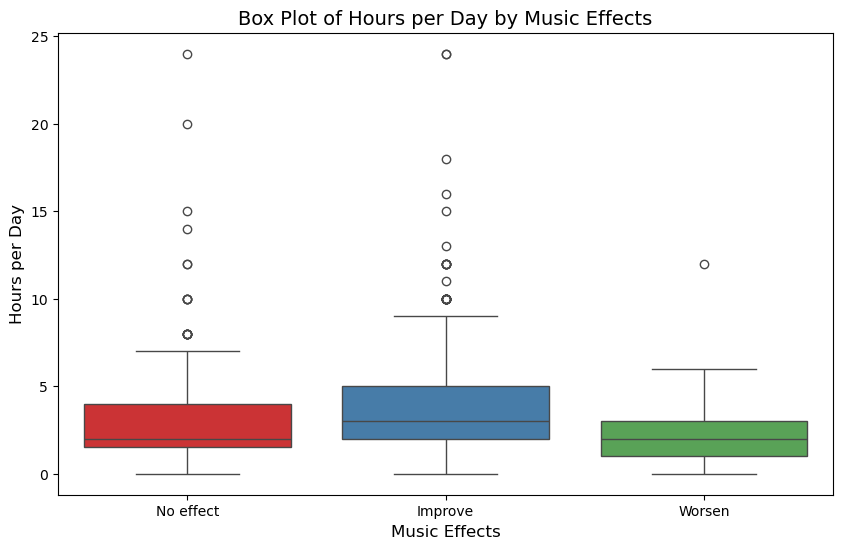

In [16]:
#BOX PLOT

def boxplot():
  """
  function to plot a box plot
  """
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Music effects', y='Hours per day', data=music_impact, palette="Set1")
  plt.title('Box Plot of Hours per Day by Music Effects', fontsize=14)
  plt.xlabel('Music Effects', fontsize=12)
  plt.ylabel('Hours per Day', fontsize=12)
  plt.show()
  return

boxplot()

In [ ]:
#VIOLIN PLOT

def violinplot():
  """
  function to plot a violin plot
  """
  plt.figure(figsize=(10, 6))
  sns.violinplot(x='Music effects', y='Hours per day', data=music_impact, palette="Set1")
  plt.title('Violin Plot of Hours per Day by Music Effects', fontsize=14)
  plt.xlabel('Music Effects', fontsize=12)
  plt.ylabel('Hours per Day', fontsize=12)
  plt.show()
  return

violinplot()

C:\Users\donaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\donaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\donaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\donaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

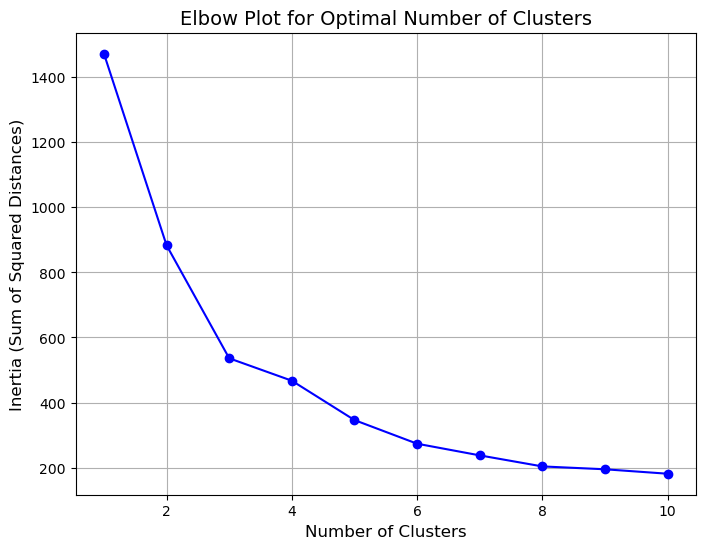

C:\Users\donaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [18]:
#ELBOW PLOT AND CLUSTERING

col = ['Hours per day', 'Insomnia'] 
X = music_impact[col]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []

#clustering
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled) 
    inertia.append(kmeans.inertia_)

#plotting elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot for Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.grid(True)
plt.show()

optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_
music_impact['Cluster'] = labels